In [1]:
from GenZ import decode_moddeling, prefill_moddeling

from GenZ.system import System
import pandas as pd
from GenZ.analye_model import *

model = 'llama_7b'
# configs
batch_size = 96
input_tokens = 128
output_tokens = 1024


,Op Type,Dimension,Op Intensity,Num ops (MFLOP),Input_a (MB),Input_w (MB),Output (MB),Total Data (MB),Compute time (msec),Memory time (msec),Bound,C/M ratio,Cycles,% of total time,Throughput (Tflops),Compute cycle,Memory cycle,Latency (msec),C Effcy
0,GEMM,[ 96 12288 1 4096],93.090909,9663.676416,0.750000,96.000000,2.250000,99.000000,0.009771,0.028435,M,0.343629,28435.202206,16.622384,339.849049,9771.159167,28435.202206,0.028435,1
1,Logit,[ 96 32 1 128 128],0.984615,100.663296,0.750000,96.000000,0.750000,97.500000,0.000102,0.027830,M,0.003657,27829.637714,16.268389,3.617126,101.782908,27829.637714,0.027830,1
2,Logit,[ 96 32 1 1 128],0.498054,0.786432,0.750000,0.750000,0.005859,1.505859,0.000001,0.000431,M,0.001844,431.154288,0.252040,1.824015,0.795179,431.154288,0.000431,1
3,Attend,[ 96 32 1 128 128],0.984615,100.663296,0.750000,96.000000,0.750000,97.500000,0.000102,0.027830,M,0.003657,27829.637714,16.268389,3.617126,101.782908,27829.637714,0.027830,1
4,Attend,[ 96 32 1 1 128],0.498054,0.786432,0.005859,0.750000,0.750000,1.505859,0.000001,0.000431,M,0.001844,431.154288,0.252040,1.824015,0.795179,431.154288,0.000431,1
5,GEMM,[ 96 4096 1 4096],91.701493,3221.225472,0.750000,32.000000,0.750000,33.500000,0.003257,0.009622,M,0.338500,9622.012868,5.624746,334.776675,3257.053056,9622.012868,0.009622,1
6,GEMM,[ 96 11008 1 4096],93.008977,8657.043456,0.750000,86.000000,2.015625,88.765625,0.008753,0.025496,M,0.343327,25495.641372,14.904003,339.549938,8753.330087,25495.641372,0.025496,1
7,GEMM,[ 96 11008 1 4096],93.008977,8657.043456,0.750000,86.000000,2.015625,88.765625,0.008753,0.025496,M,0.343327,25495.641372,14.904003,339.549938,8753.330087,25495.641372,0.025496,1
8,GEMM,[ 96 4096 1 11008],93.008977,8657.043456,2.015625,86.000000,0.750000,88.765625,0.008753,0.025496,M,0.343327,25495.641372,14.904003,339.549938,8753.330087,25495.641372,0.025496,1


,MACs (MFLOP),Total Data (MB),Total Weights (MB),Parameters (MB),On-chip Memory Footprint (MB),Latency (msec),Cycles
0,39058.93171,596.80859,386.00000,386.00000,99.00000,0.17107,171065.72319


[[12.56237879  0.        ]
 [14.99519629  2.99519629]
 [15.3931363   2.99519629]]
[12.56237879 14.99519629 15.3931363 ]
[0.         2.99519629 2.99519629]


,Op Type,Dimension,Op Intensity,Num ops (MFLOP),Input_a (MB),Input_w (MB),Output (MB),Total Data (MB),Compute time (msec),Memory time (msec),Bound,C/M ratio,Cycles,% of total time,Throughput (Tflops),Compute cycle,Memory cycle,Latency (msec),C Effcy
0,GEMM,[ 96 12288 1 4096],93.090909,9663.676416,0.750000,96.000000,2.250000,99.000000,0.009771,0.028435,M,0.343629,28435.202206,4.642772,339.849049,9771.159167,28435.202206,0.028435,1
1,Logit,[ 96 32 1 128 128],0.984615,100.663296,0.750000,96.000000,0.750000,97.500000,0.000102,0.027830,M,0.003657,27829.637714,4.543898,3.617126,101.782908,27829.637714,0.027830,1
2,Logit,[ 96 32 1 1024 128],0.991288,805.306368,0.750000,768.000000,6.000000,774.750000,0.000814,0.221129,M,0.003682,221129.174326,36.104976,3.641792,814.263264,221129.174326,0.221129,1
3,Attend,[ 96 32 1 128 128],0.984615,100.663296,0.750000,96.000000,0.750000,97.500000,0.000102,0.027830,M,0.003657,27829.637714,4.543898,3.617126,101.782908,27829.637714,0.027830,1
4,Attend,[ 96 32 1 1024 128],0.991288,805.306368,6.000000,768.000000,0.750000,774.750000,0.000814,0.221129,M,0.003682,221129.174326,36.104976,3.641792,814.263264,221129.174326,0.221129,1
5,GEMM,[ 96 4096 1 4096],91.701493,3221.225472,0.750000,32.000000,0.750000,33.500000,0.003257,0.009622,M,0.338500,9622.012868,1.571039,334.776675,3257.053056,9622.012868,0.009622,1
6,GEMM,[ 96 11008 1 4096],93.008977,8657.043456,0.750000,86.000000,2.015625,88.765625,0.008753,0.025496,M,0.343327,25495.641372,4.162814,339.549938,8753.330087,25495.641372,0.025496,1
7,GEMM,[ 96 11008 1 4096],93.008977,8657.043456,0.750000,86.000000,2.015625,88.765625,0.008753,0.025496,M,0.343327,25495.641372,4.162814,339.549938,8753.330087,25495.641372,0.025496,1
8,GEMM,[ 96 4096 1 11008],93.008977,8657.043456,2.015625,86.000000,0.750000,88.765625,0.008753,0.025496,M,0.343327,25495.641372,4.162814,339.549938,8753.330087,25495.641372,0.025496,1


,MACs (MFLOP),Total Data (MB),Total Weights (MB),Parameters (MB),On-chip Memory Footprint (MB),Latency (msec),Cycles
0,40667.97158,2143.29688,386.00000,386.00000,774.75000,0.61246,612461.76327


[[12.56237879  0.        ]
 [14.99519629  2.99519629]
 [15.3931363   2.99519629]]
[12.56237879 14.99519629 15.3931363 ]
[0.         2.99519629 2.99519629]
Decode Latency:12.536439783432904 msec
single_pipe_stage:12.536439783432904 msec; single_layer_time:0.39176374323227825 msec
Layers per pipeline stage:32
Error = 56.33446786489125 in latency calc. Avg Decode Latency:12.536439783432904 msec , Latency based on last token : 19.598776424632355 msec
Attn time:15.933363970588236; Linear time:3.6654124540441178; AR time:0; Pipeline Comm time:0.0


/workspace/weixuechao/GenZ-LLM-Analyzer/GenZ/LLM_inference/llm_decode.py:198: UserWarning: Error in latency calc. Avg Decode Latency:12.536439783432904 msec , Latency based on last token : 19.598776424632355 msec, 
 Attn time:15.933363970588236; Linear time:3.6654124540441178; AR time:0; Pipeline Comm time:0.0
  warnings.warn(f"Error in latency calc. Avg Decode Latency:{decode_latency} msec , Latency based on last token : {total_time} msec, \n Attn time:{attn_time}; Linear time:{linear_time}; AR time:{all_reduce_delay * (num_layers_per_pipeline_stage)}; Pipeline Comm time:{single_stage_pipe_delay * (pipeline_parallel-1)}")


{'Latency': np.float64(12.536439783432904),
 'Throughput': np.float64(7657.6764742144305),
 'Runtime_breakdown': [np.float64(3.6654124540441178),
  np.float64(15.933363970588236),
  0.0],
 'is_offload': False}

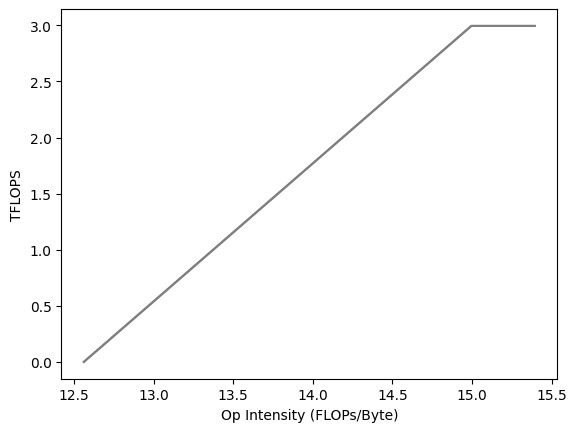

In [2]:
decode_moddeling(model=model,
                 batch_size=batch_size,
                 Bb=1,
                 input_tokens=input_tokens,
                 output_tokens=output_tokens,
                 model_profilling=False,
                 system_name='H100_GPU',
                 bits='bf16',
                 tensor_parallel=1,
                 pipeline_parallel=1,
                 debug=True,
                 time_breakdown=True)

,Op Type,Dimension,Op Intensity,Num ops (MFLOP),Input_a (MB),Input_w (MB),Output (MB),Total Data (MB),Compute time (msec),Memory time (msec),Bound,C/M ratio,Cycles,% of total time,Throughput (Tflops),Compute cycle,Memory cycle,Latency (msec),C Effcy
0,GEMM,[ 96 12288 1 4096],93.090909,9663.676416,0.750000,96.000000,2.250000,99.000000,0.067390,0.028435,C,2.369938,67389.654226,20.632317,143.400000,67389.654226,28435.202206,0.067390,1
1,Logit,[ 96 32 1 128 128],0.984615,100.663296,0.750000,96.000000,0.750000,97.500000,0.000702,0.027830,M,0.025224,27829.637714,8.520446,3.617126,701.975565,27829.637714,0.027830,1
2,Logit,[ 96 32 1 0 128],0.000000,0.000000,0.750000,0.000000,0.000000,0.750000,0.000000,0.000000,M,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,Attend,[ 96 32 1 128 128],0.984615,100.663296,0.750000,96.000000,0.750000,97.500000,0.000702,0.027830,M,0.025224,27829.637714,8.520446,3.617126,701.975565,27829.637714,0.027830,1
4,Attend,[ 96 32 1 0 128],0.000000,0.000000,0.000000,0.000000,0.750000,0.750000,0.000000,0.000000,M,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
5,GEMM,[ 96 4096 1 4096],91.701493,3221.225472,0.750000,32.000000,0.750000,33.500000,0.022463,0.009622,C,2.334565,22463.218075,6.877439,143.400000,22463.218075,9622.012868,0.022463,1
6,GEMM,[ 96 11008 1 4096],93.008977,8657.043456,0.750000,86.000000,2.015625,88.765625,0.060370,0.025496,C,2.367852,60369.898577,18.483117,143.400000,60369.898577,25495.641372,0.060370,1
7,GEMM,[ 96 11008 1 4096],93.008977,8657.043456,0.750000,86.000000,2.015625,88.765625,0.060370,0.025496,C,2.367852,60369.898577,18.483117,143.400000,60369.898577,25495.641372,0.060370,1
8,GEMM,[ 96 4096 1 11008],93.008977,8657.043456,2.015625,86.000000,0.750000,88.765625,0.060370,0.025496,C,2.367852,60369.898577,18.483117,143.400000,60369.898577,25495.641372,0.060370,1


,MACs (MFLOP),Total Data (MB),Total Weights (MB),Parameters (MB),On-chip Memory Footprint (MB),Latency (msec),Cycles
0,39057.35885,595.29688,386.00000,386.00000,99.00000,0.32662,326621.84346


Number of points: 9


,Op Type,Dimension,Op Intensity,Num ops (MFLOP),Input_a (MB),Input_w (MB),Output (MB),Total Data (MB),Compute time (msec),Memory time (msec),Bound,C/M ratio,Cycles,% of total time,Throughput (Tflops),Compute cycle,Memory cycle,Latency (msec),C Effcy
0,GEMM,[ 96 12288 1 4096],93.090909,9663.676416,0.750000,96.000000,2.250000,99.000000,0.067390,0.028435,C,2.369938,67389.654226,8.764650,143.400000,67389.654226,28435.202206,0.067390,1
1,Logit,[ 96 32 1 128 128],0.984615,100.663296,0.750000,96.000000,0.750000,97.500000,0.000702,0.027830,M,0.025224,27829.637714,3.619502,3.617126,701.975565,27829.637714,0.027830,1
2,Logit,[ 96 32 1 1024 128],0.991288,805.306368,0.750000,768.000000,6.000000,774.750000,0.005616,0.221129,M,0.025396,221129.174326,28.759900,3.641792,5615.804519,221129.174326,0.221129,1
3,Attend,[ 96 32 1 128 128],0.984615,100.663296,0.750000,96.000000,0.750000,97.500000,0.000702,0.027830,M,0.025224,27829.637714,3.619502,3.617126,701.975565,27829.637714,0.027830,1
4,Attend,[ 96 32 1 1024 128],0.991288,805.306368,6.000000,768.000000,0.750000,774.750000,0.005616,0.221129,M,0.025396,221129.174326,28.759900,3.641792,5615.804519,221129.174326,0.221129,1
5,GEMM,[ 96 4096 1 4096],91.701493,3221.225472,0.750000,32.000000,0.750000,33.500000,0.022463,0.009622,C,2.334565,22463.218075,2.921550,143.400000,22463.218075,9622.012868,0.022463,1
6,GEMM,[ 96 11008 1 4096],93.008977,8657.043456,0.750000,86.000000,2.015625,88.765625,0.060370,0.025496,C,2.367852,60369.898577,7.851665,143.400000,60369.898577,25495.641372,0.060370,1
7,GEMM,[ 96 11008 1 4096],93.008977,8657.043456,0.750000,86.000000,2.015625,88.765625,0.060370,0.025496,C,2.367852,60369.898577,7.851665,143.400000,60369.898577,25495.641372,0.060370,1
8,GEMM,[ 96 4096 1 11008],93.008977,8657.043456,2.015625,86.000000,0.750000,88.765625,0.060370,0.025496,C,2.367852,60369.898577,7.851665,143.400000,60369.898577,25495.641372,0.060370,1


,MACs (MFLOP),Total Data (MB),Total Weights (MB),Parameters (MB),On-chip Memory Footprint (MB),Latency (msec),Cycles
0,40667.97158,2143.29688,386.00000,386.00000,774.75000,0.76888,768880.19211


Number of points: 9
Decode Latency:17.528032569227992 msec
single_pipe_stage:17.528032569227992 msec; single_layer_time:0.5477510177883748 msec
Layers per pipeline stage:32
Error = 40.37038127629993 in latency calc. Avg Decode Latency:17.528032569227992 msec , Latency based on last token : 24.604166147659363 msec
Attn time:15.933363970588236; Linear time:8.67080217707113; AR time:0; Pipeline Comm time:0.0


{'Latency': np.float64(17.528032569227992),
 'Throughput': np.float64(5476.940987007091),
 'Runtime_breakdown': [np.float64(8.67080217707113),
  np.float64(15.933363970588236),
  0.0],
 'is_offload': False}

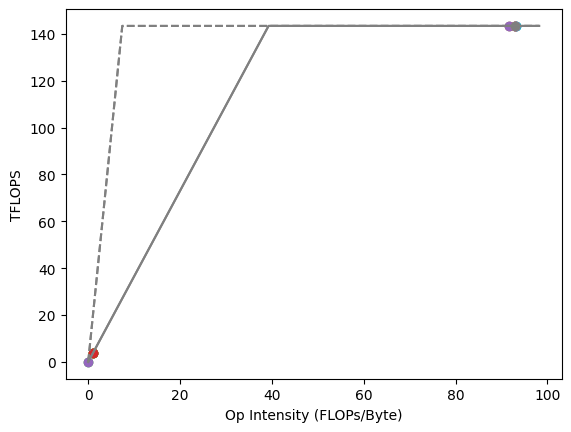

In [5]:
decode_moddeling(model=model,
                 batch_size=batch_size,
                 Bb=1,
                 input_tokens=input_tokens,
                 output_tokens=output_tokens,
                 model_profilling=False,
                 system_name='SPR_HBM3e',
                 bits='bf16',
                 tensor_parallel=1,
                 pipeline_parallel=1,
                 debug=True,
                 time_breakdown=True)